# Assignment-11 Amazon Product Reviews

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
reviews=pd.read_csv('extract_reviews.csv')
reviews

,stars,comment
0,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n I like this produc...
1,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n So far so good\n \n
2,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Sometimes signal l...
3,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Ok\n \n
4,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n I have used it alr...
...,...,...
1185,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Good Qualty worth ...
1186,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Good\n \n
1187,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n Good but not 5ghz\...
1188,4.0 out of 5 stars,\n\n\n\n\n\n\n\n \n \n This is good produ...


# Text Preprocessing

In [3]:
reviews=[comment.strip() for comment in reviews.comment] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
reviews[0:10]

['I like this product.... Price worthy and easy to install.',
 'So far so good',
 'Sometimes signal lost but otherwise working fine. 👍🏻',
 'Ok',
 'I have used it already  so bought same model',
 'Good Qualty worth buying',
 'Good',
 'Good but not 5ghz',
 'This is good product .',
 "Hey please take it back..it's not working after 10 days...even I don't know how to return it to you.. can you please connect with me so that I can return it to you.. thanks and please consider my request .. actually it suddenly stip working and I don't have any clue why does not work properly now.hope u will consider my problem and exchange it as soon as possible"]

In [4]:
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text

"I like this product.... Price worthy and easy to install. So far so good Sometimes signal lost but otherwise working fine. 👍🏻 Ok I have used it already  so bought same model Good Qualty worth buying Good Good but not 5ghz This is good product . Hey please take it back..it's not working after 10 days...even I don't know how to return it to you.. can you please connect with me so that I can return it to you.. thanks and please consider my request .. actually it suddenly stip working and I don't have any clue why does not work properly now.hope u will consider my problem and exchange it as soon as possible I like this product.... Price worthy and easy to install. So far so good Sometimes signal lost but otherwise working fine. 👍🏻 Ok I have used it already  so bought same model Good Qualty worth buying Good Good but not 5ghz This is good product . I like this product.... Price worthy and easy to install. I like this product.... Price worthy and easy to install. Hey please take it back..it

In [5]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I like this product Price worthy and easy to install So far so good Sometimes signal lost but otherwise working fine 👍🏻 Ok I have used it already  so bought same model Good Qualty worth buying Good Good but not 5ghz This is good product  Hey please take it backits not working after 10 dayseven I dont know how to return it to you can you please connect with me so that I can return it to you thanks and please consider my request  actually it suddenly stip working and I dont have any clue why does not work properly nowhope u will consider my problem and exchange it as soon as possible I like this product Price worthy and easy to install So far so good Sometimes signal lost but otherwise working fine 👍🏻 Ok I have used it already  so bought same model Good Qualty worth buying Good Good but not 5ghz This is good product  I like this product Price worthy and easy to install I like this product Price worthy and easy to install Hey please take it backits not working after 10 dayseven I dont kn

In [6]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Raj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['I', 'like', 'this', 'product', 'Price', 'worthy', 'and', 'easy', 'to', 'install', 'So', 'far', 'so', 'good', 'Sometimes', 'signal', 'lost', 'but', 'otherwise', 'working', 'fine', '👍🏻', 'Ok', 'I', 'have', 'used', 'it', 'already', 'so', 'bought', 'same', 'model', 'Good', 'Qualty', 'worth', 'buying', 'Good', 'Good', 'but', 'not', '5ghz', 'This', 'is', 'good', 'product', 'Hey', 'please', 'take', 'it', 'backits']


In [8]:
len(text_tokens)

13447

In [9]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['like', 'product', 'Price', 'worthy', 'easy', 'install', 'So', 'far', 'good', 'Sometimes', 'signal', 'lost', 'otherwise', 'working', 'fine', '👍🏻', 'Ok', 'used', 'already', 'bought', 'model', 'Good', 'Qualty', 'worth', 'buying', 'Good', 'Good', '5ghz', 'This', 'good', 'product', 'Hey', 'please', 'take', 'backits', 'working', '10', 'dayseven', 'dont', 'know', 'return', 'please', 'connect', 'return', 'thanks', 'please', 'consider', 'request', 'actually', 'suddenly', 'stip', 'working', 'dont', 'clue', 'work', 'properly', 'nowhope', 'u', 'consider', 'problem', 'exchange', 'soon', 'possible', 'like', 'product', 'Price', 'worthy', 'easy', 'install', 'So', 'far', 'good', 'Sometimes', 'signal', 'lost', 'otherwise', 'working', 'fine', '👍🏻', 'Ok', 'used', 'already', 'bought', 'model', 'Good', 'Qualty', 'worth', 'buying', 'Good', 'Good', '5ghz', 'This', 'good', 'product', 'like', 'product', 'Price', 'worthy', 'easy', 'install', 'like', 'product', 'Price', 'worthy', 'easy', 'install', 'Hey', 'plea

In [10]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['like', 'product', 'price', 'worthy', 'easy', 'install', 'so', 'far', 'good', 'sometimes', 'signal', 'lost', 'otherwise', 'working', 'fine', '👍🏻', 'ok', 'used', 'already', 'bought', 'model', 'good', 'qualty', 'worth', 'buying', 'good', 'good', '5ghz', 'this', 'good', 'product', 'hey', 'please', 'take', 'backits', 'working', '10', 'dayseven', 'dont', 'know', 'return', 'please', 'connect', 'return', 'thanks', 'please', 'consider', 'request', 'actually', 'suddenly', 'stip', 'working', 'dont', 'clue', 'work', 'properly', 'nowhope', 'u', 'consider', 'problem', 'exchange', 'soon', 'possible', 'like', 'product', 'price', 'worthy', 'easy', 'install', 'so', 'far', 'good', 'sometimes', 'signal', 'lost', 'otherwise', 'working', 'fine', '👍🏻', 'ok', 'used', 'already', 'bought', 'model', 'good', 'qualty', 'worth', 'buying', 'good', 'good', '5ghz', 'this', 'good', 'product', 'like', 'product', 'price', 'worthy', 'easy', 'install', 'like', 'product', 'price', 'worthy', 'easy', 'install', 'hey', 'plea

In [11]:
# Stemming (Optional)
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['like', 'product', 'price', 'worthi', 'easi', 'instal', 'so', 'far', 'good', 'sometim', 'signal', 'lost', 'otherwis', 'work', 'fine', '👍🏻', 'ok', 'use', 'alreadi', 'bought', 'model', 'good', 'qualti', 'worth', 'buy', 'good', 'good', '5ghz', 'thi', 'good', 'product', 'hey', 'pleas', 'take', 'backit', 'work', '10', 'dayseven', 'dont', 'know', 'return', 'pleas', 'connect', 'return', 'thank', 'pleas', 'consid', 'request', 'actual', 'suddenli', 'stip', 'work', 'dont', 'clue', 'work', 'properli', 'nowhop', 'u', 'consid', 'problem', 'exchang', 'soon', 'possibl', 'like', 'product', 'price', 'worthi', 'easi', 'instal', 'so', 'far', 'good', 'sometim', 'signal', 'lost', 'otherwis', 'work', 'fine', '👍🏻', 'ok', 'use', 'alreadi', 'bought', 'model', 'good', 'qualti', 'worth', 'buy', 'good', 'good', '5ghz', 'thi', 'good', 'product', 'like', 'product', 'price', 'worthi', 'easi', 'instal', 'like', 'product', 'price', 'worthi', 'easi', 'instal', 'hey', 'pleas', 'take', 'backit', 'work', '10', 'dayseven'

In [12]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

like product price worthy easy install so far good sometimes signal lost otherwise working fine 👍🏻 ok used already bought model good qualty worth buying good good 5ghz this good product hey please take backits working 10 dayseven dont know return please connect return thanks please consider request actually suddenly stip working dont clue work properly nowhope u consider problem exchange soon possible like product price worthy easy install so far good sometimes signal lost otherwise working fine 👍🏻 ok used already bought model good qualty worth buying good good 5ghz this good product like product price worthy easy install like product price worthy easy install hey please take backits working 10 dayseven dont know return please connect return thanks please consider request actually suddenly stip working dont clue work properly nowhope u consider problem exchange soon possible so far good sometimes signal lost otherwise working fine 👍🏻 ok used already bought model good qualty worth buyin

In [13]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['like', 'product', 'price', 'worthy', 'easy', 'install', 'so', 'far', 'good', 'sometimes', 'signal', 'lose', 'otherwise', 'work', 'fine', '👍', '🏻', 'ok', 'use', 'already', 'buy', 'model', 'good', 'qualty', 'worth', 'buy', 'good', 'good', '5ghz', 'this', 'good', 'product', 'hey', 'please', 'take', 'backit', 'work', '10', 'dayseven', 'do', 'not', 'know', 'return', 'please', 'connect', 'return', 'thank', 'please', 'consider', 'request', 'actually', 'suddenly', 'stip', 'working', 'do', 'not', 'clue', 'work', 'properly', 'nowhope', 'u', 'consider', 'problem', 'exchange', 'soon', 'possible', 'like', 'product', 'price', 'worthy', 'easy', 'install', 'so', 'far', 'good', 'sometimes', 'signal', 'lose', 'otherwise', 'work', 'fine', '👍', '🏻', 'ok', 'use', 'already', 'buy', 'model', 'good', 'qualty', 'worth', 'buy', 'good', 'good', '5ghz', 'this', 'good', 'product', 'like', 'product', 'price', 'worthy', 'easy', 'install', 'like', 'product', 'price', 'worthy', 'easy', 'install', 'hey', 'please', 't

In [14]:
clean_reviews=' '.join(lemmas)
clean_reviews

'like product price worthy easy install so far good sometimes signal lose otherwise work fine 👍 🏻 ok use already buy model good qualty worth buy good good 5ghz this good product hey please take backit work 10 dayseven do not know return please connect return thank please consider request actually suddenly stip working do not clue work properly nowhope u consider problem exchange soon possible like product price worthy easy install so far good sometimes signal lose otherwise work fine 👍 🏻 ok use already buy model good qualty worth buy good good 5ghz this good product like product price worthy easy install like product price worthy easy install hey please take backit work 10 dayseven do not know return please connect return thank please consider request actually suddenly stip working do not clue work properly nowhope u consider problem exchange soon possible so far good sometimes signal lose otherwise work fine 👍 🏻 ok use already buy model good qualty worth buy good good 5ghz this good p

# Feature Extaction

### Using CountVectorizer

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [16]:
print(cv.vocabulary_)

{'like': 19, 'product': 30, 'price': 28, 'worthy': 48, 'easy': 11, 'install': 17, 'so': 36, 'far': 13, 'good': 15, 'sometimes': 37, 'signal': 35, 'lose': 20, 'otherwise': 25, 'work': 45, 'fine': 14, 'ok': 24, 'use': 44, 'already': 3, 'buy': 5, 'model': 21, 'qualty': 32, 'worth': 47, '5ghz': 1, 'this': 43, 'hey': 16, 'please': 26, 'take': 41, 'backit': 4, '10': 0, 'dayseven': 9, 'do': 10, 'not': 22, 'know': 18, 'return': 34, 'connect': 7, 'thank': 42, 'consider': 8, 'request': 33, 'actually': 2, 'suddenly': 40, 'stip': 39, 'working': 46, 'clue': 6, 'properly': 31, 'nowhope': 23, 'problem': 29, 'exchange': 12, 'soon': 38, 'possible': 27}


In [19]:
print(cv.get_feature_names()[1:27])

['5ghz', 'actually', 'already', 'backit', 'buy', 'clue', 'connect', 'consider', 'dayseven', 'do', 'easy', 'exchange', 'far', 'fine', 'good', 'hey', 'install', 'know', 'like', 'lose', 'model', 'not', 'nowhope', 'ok', 'otherwise', 'please']


In [20]:
print(reviewscv.toarray()[1:27])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
print(reviewscv.toarray().shape)

(7854, 49)


### CountVectorizer with N-grams (Bigrams & Trigrams)

In [22]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [23]:
print(cv_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['10', '5ghz', 'actually', 'already', 'backit', 'buy', 'clue', 'connect', 'consider', 'dayseven', 'do', 'easy', 'exchange', 'far', 'fine', 'good', 'hey', 'install', 'know', 'like', 'lose', 'model', 'not', 'nowhope', 'ok', 'otherwise', 'please', 'possible', 'price', 'problem', 'product', 'properly', 'qualty', 'request', 'return', 'signal', 'so', 'sometimes', 'soon', 'stip', 'suddenly', 'take', 'thank', 'this', 'use', 'work', 'working', 'worth', 'worthy']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


### TF-IDF Vectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngram_max_features=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_matrix_ngram=tfidfv_ngram_max_features.fit_transform(lemmas)

In [25]:
print(tfidfv_ngram_max_features.get_feature_names())
print(tfidf_matrix_ngram.toarray())

['10', '5ghz', 'actually', 'already', 'backit', 'buy', 'clue', 'connect', 'consider', 'dayseven', 'do', 'easy', 'exchange', 'far', 'fine', 'good', 'hey', 'install', 'know', 'like', 'lose', 'model', 'not', 'nowhope', 'ok', 'otherwise', 'please', 'possible', 'price', 'problem', 'product', 'properly', 'qualty', 'request', 'return', 'signal', 'so', 'sometimes', 'soon', 'stip', 'suddenly', 'take', 'thank', 'this', 'use', 'work', 'working', 'worth', 'worthy']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# Generate Word Cloud

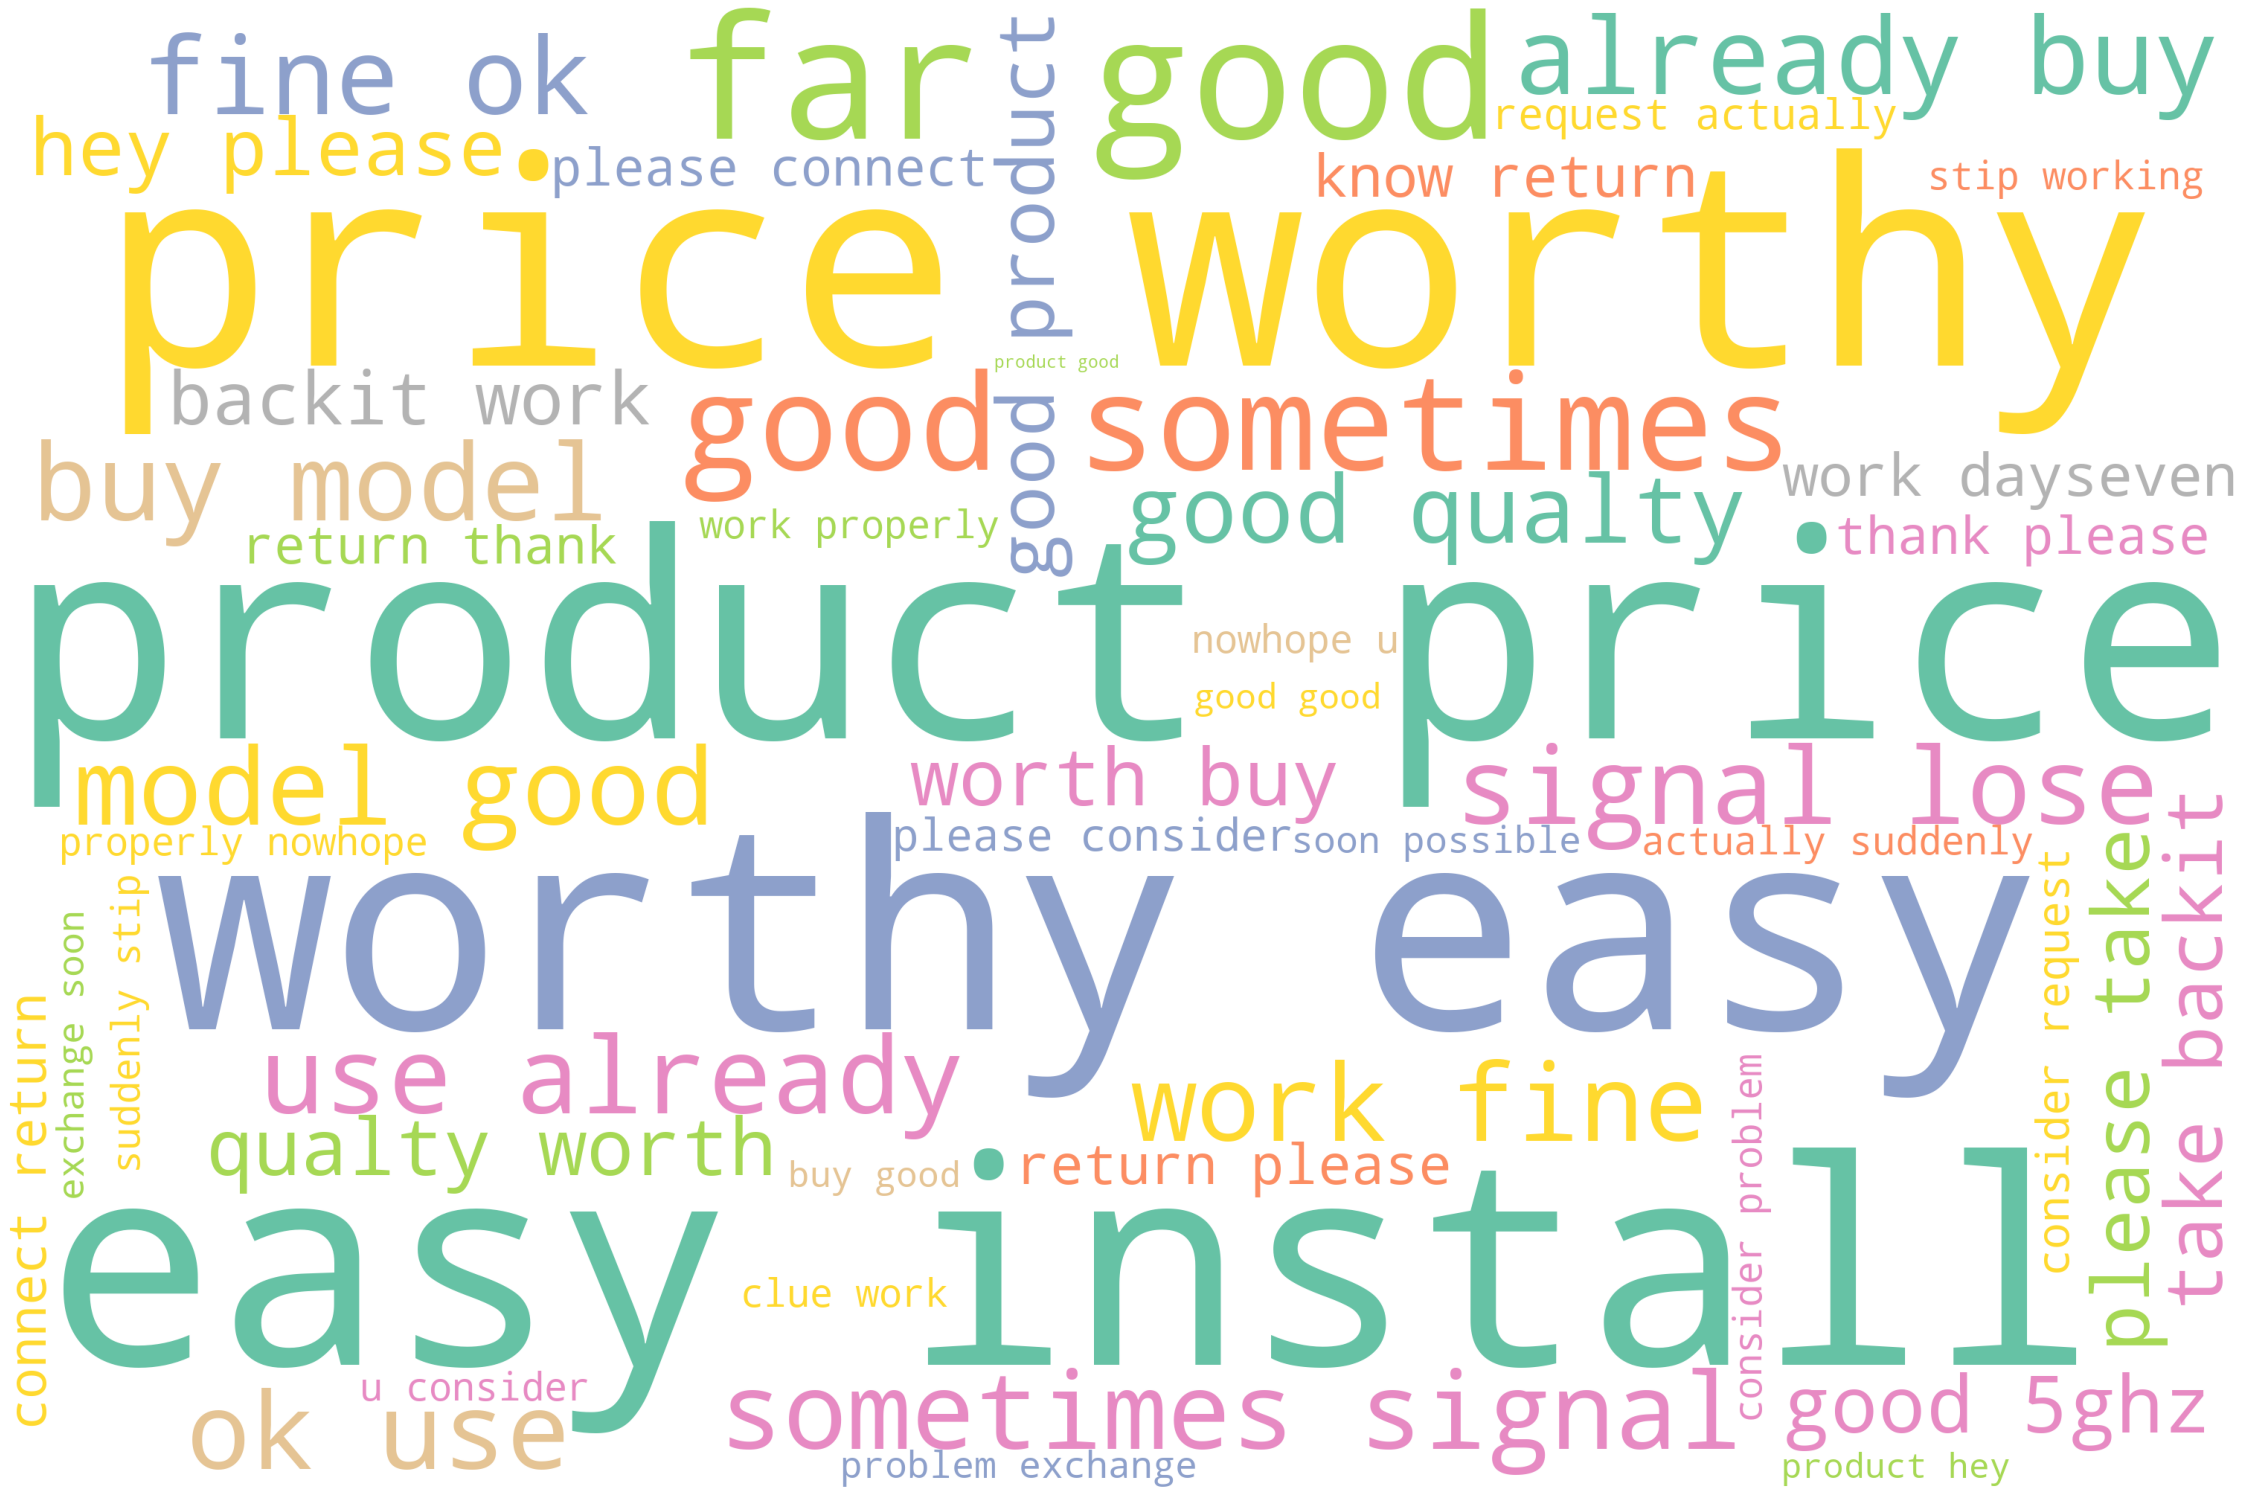

In [26]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

# Generate word cloud

STOPWORDS.add('Pron')
wordcloud=WordCloud(width=3000,height=2000,background_color='white',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

# Named Entity Recognition (NER)

In [27]:
# Parts of speech (POS) tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [28]:
for token in doc_block[100:200]:
    print(token,token.pos_)

price NOUN
worthy ADJ
easy ADJ
install NOUN
like ADP
product NOUN
price NOUN
worthy ADJ
easy ADJ
install NOUN
hey INTJ
please INTJ
take VERB
backit ADJ
work NOUN
10 NUM
dayseven NOUN
do AUX
not PART
know VERB
return VERB
please INTJ
connect VERB
return NOUN
thank VERB
please INTJ
consider VERB
request NOUN
actually ADV
suddenly ADV
stip NOUN
working VERB
do AUX
not PART
clue VERB
work NOUN
properly ADV
nowhope ADP
u PRON
consider VERB
problem NOUN
exchange NOUN
soon ADV
possible ADJ
so ADV
far ADV
good ADJ
sometimes ADV
signal VERB
lose VERB
otherwise ADV
work NOUN
fine ADJ
👍 NUM
🏻 NOUN
ok ADJ
use NOUN
already ADV
buy VERB
model NOUN
good PROPN
qualty PROPN
worth ADJ
buy VERB
good ADJ
good ADJ
5ghz NUM
this DET
good ADJ
product NOUN
so ADV
far ADV
good ADJ
sometimes ADV
signal VERB
lose VERB
otherwise ADV
work NOUN
fine ADJ
👍 NUM
🏻 NOUN
ok ADJ
use NOUN
already ADV
buy VERB
model NOUN
good PROPN
qualty PROPN
worth ADJ
buy VERB
good ADJ
good ADJ
5ghz NUM
this DET
good ADJ
product NOUN
he

In [29]:
# Filtering the nouns and verbs only
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['price', 'install', 'take', 'work', 'dayseven', 'know', 'return', 'connect', 'return', 'thank', 'consider', 'request', 'stip', 'working', 'clue', 'work', 'consider', 'problem', 'exchange', 'signal', 'lose', 'work', '🏻', 'use', 'buy', 'model', 'buy', 'product', 'take', 'work', 'dayseven', 'know', 'return', 'connect', 'return', 'thank', 'consider', 'request', 'stip', 'working', 'clue', 'work', 'consider', 'problem', 'exchange', 'product', 'price', 'install', 'signal', 'lose', 'work', '🏻', 'use', 'buy', 'model', 'buy', 'product', 'take', 'work', 'dayseven', 'know', 'return', 'connect', 'return', 'thank', 'consider', 'request', 'stip', 'working', 'clue', 'work', 'consider', 'problem', 'exchange', 'product', 'price', 'install', 'signal', 'lose', 'work', '🏻', 'use', 'buy', 'model', 'buy', 'product', 'take', 'work', 'dayseven', 'know', 'return', 'connect', 'return', 'thank', 'consider', 'request', 'stip', 'working', 'clue', 'work']


In [30]:
# Counting the noun & verb tokens
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,work,357
1,product,238
2,buy,238
3,return,238
4,consider,238
5,price,119
6,install,119
7,signal,119
8,lose,119
9,use,119


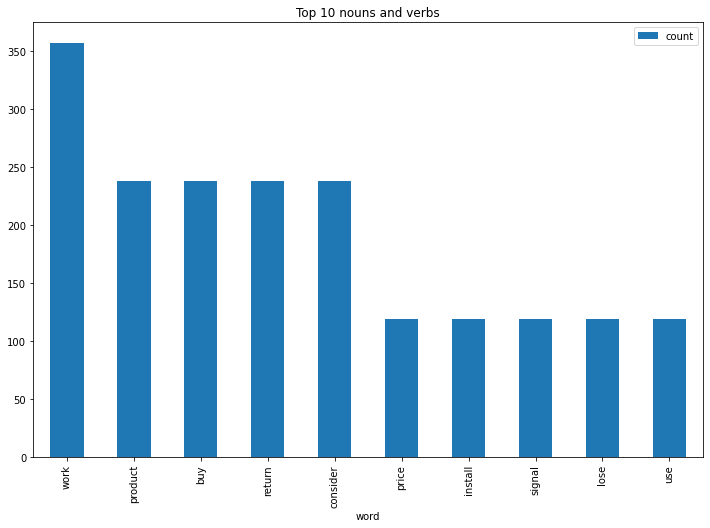

In [31]:
# Visualizing results (Barchart for top 10 nouns + verbs)
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

# Emotion Mining - Sentiment Analysis

In [32]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(reviews))
sentences

['I like this product.... Price worthy and easy to install.',
 'So far so good Sometimes signal lost but otherwise working fine.',
 '👍🏻 Ok I have used it already  so bought same model Good Qualty worth buying Good Good but not 5ghz This is good product .',
 "Hey please take it back..it's not working after 10 days...even I don't know how to return it to you.. can you please connect with me so that I can return it to you.. thanks and please consider my request .. actually it suddenly stip working and I don't have any clue why does not work properly now.hope u will consider my problem and exchange it as soon as possible I like this product.... Price worthy and easy to install.",
 'So far so good Sometimes signal lost but otherwise working fine.',
 '👍🏻 Ok I have used it already  so bought same model Good Qualty worth buying Good Good but not 5ghz This is good product .',
 'I like this product.... Price worthy and easy to install.',
 'I like this product.... Price worthy and easy to install

In [33]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,I like this product.... Price worthy and easy ...
1,So far so good Sometimes signal lost but other...
2,👍🏻 Ok I have used it already so bought same m...
3,Hey please take it back..it's not working afte...
4,So far so good Sometimes signal lost but other...
...,...
353,👍🏻 Ok I have used it already so bought same m...
354,Hey please take it back..it's not working afte...
355,So far so good Sometimes signal lost but other...
356,👍🏻 Ok I have used it already so bought same m...


In [34]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Database/Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [35]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [36]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [37]:
# manual testing
calculate_sentiment(text='good service')

3

In [38]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      5
1      5
2      5
3      8
4      5
      ..
353    5
354    8
355    5
356    5
357    3
Name: sentiment_value, Length: 358, dtype: int64

In [39]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      10
1      11
2      25
3      79
4      11
       ..
353    25
354    79
355    11
356    25
357    69
Name: word_count, Length: 358, dtype: int64

In [40]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
357,Hey please take it back..it's not working afte...,3,69
125,This is good product .,3,5
159,This is good product .,3,5
175,This is good product .,3,5
195,This is good product .,3,5
...,...,...,...
173,👍🏻 Ok I have used it already so bought same m...,10,99
63,👍🏻 Ok I have used it already so bought same m...,10,100
115,👍🏻 Ok I have used it already so bought same m...,10,96
318,Hey please take it back..it's not working afte...,11,148


In [41]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    358.000000
mean       6.142458
std        1.594576
min        3.000000
25%        5.000000
50%        5.000000
75%        8.000000
max       12.000000
Name: sentiment_value, dtype: float64

In [43]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count


In [44]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,I like this product.... Price worthy and easy ...,5,10
1,So far so good Sometimes signal lost but other...,5,11
2,👍🏻 Ok I have used it already so bought same m...,5,25
3,Hey please take it back..it's not working afte...,8,79
4,So far so good Sometimes signal lost but other...,5,11
...,...,...,...
353,👍🏻 Ok I have used it already so bought same m...,5,25
354,Hey please take it back..it's not working afte...,8,79
355,So far so good Sometimes signal lost but other...,5,11
356,👍🏻 Ok I have used it already so bought same m...,5,25


In [45]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,I like this product.... Price worthy and easy ...,5,10,0
1,So far so good Sometimes signal lost but other...,5,11,1
2,👍🏻 Ok I have used it already so bought same m...,5,25,2
3,Hey please take it back..it's not working afte...,8,79,3
4,So far so good Sometimes signal lost but other...,5,11,4
...,...,...,...,...
353,👍🏻 Ok I have used it already so bought same m...,5,25,353
354,Hey please take it back..it's not working afte...,8,79,354
355,So far so good Sometimes signal lost but other...,5,11,355
356,👍🏻 Ok I have used it already so bought same m...,5,25,356


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

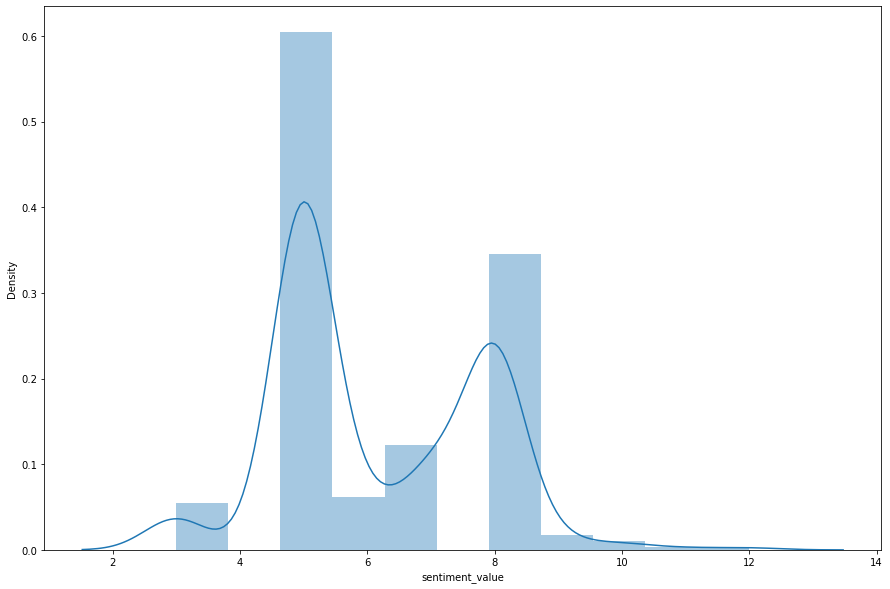

In [46]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

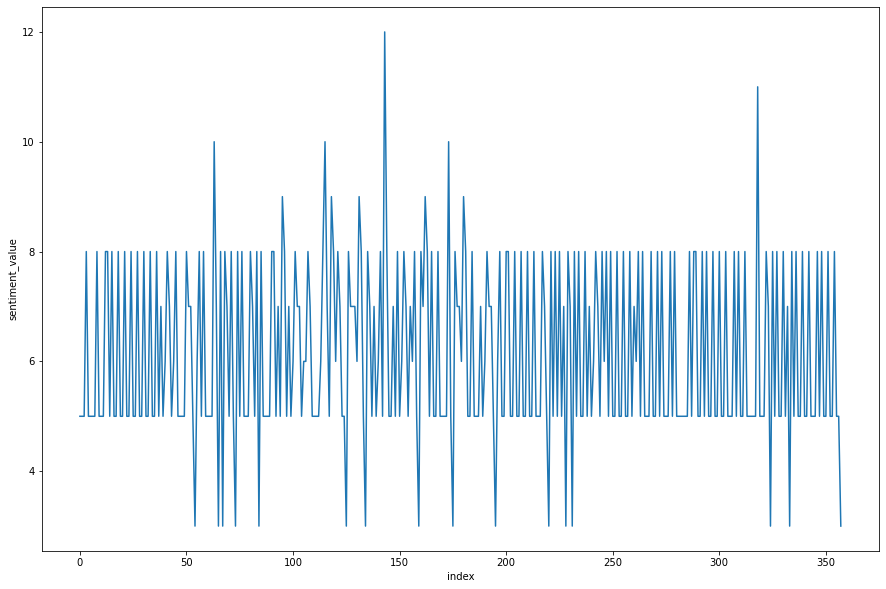

In [47]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)